# Introduction

The Algorithm **Fuzzy c-means (FCM)** is a method of clustering which allows one piece of data to belong to two or more clusters. This method (developed by Dunn in 1973 and improved by Bezdek in 1981) is frequently used in pattern recognition. You can find the documentation here [https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/cmeans.html](http://)

**Any feedback on this kernel will be highly appreciated!**

# Loading modules and training data

In [1]:
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt
# # 将网格线置于曲线之下
# plt.rcParams['axes.axisbelow'] = False
plt.style.use('fivethirtyeight') # 'ggplot'

from scipy.stats import multivariate_normal

In [2]:
import seaborn as sns
from copy import deepcopy

In [4]:
# 返回字典
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# iris数据集的特征列
features = data['data']
features.shape

(150, 4)

In [6]:
# iris数据集的标签
target = data['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
target.shape

(150,)

In [8]:
# 增加维度1，用于拼接
target = target[:, np.newaxis]
target.shape

(150, 1)

In [9]:
np.unique(target)

array([0, 1, 2])

In [10]:
target_names = data['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
target_dicts = dict(zip(np.unique(target), target_names))
target_dicts

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [12]:
feature_names = data['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
np.concatenate([features, target], axis=1)

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [14]:
np.concatenate?

In [15]:
pd.DataFrame?

In [16]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
# 浅拷贝，防止原地修改
feature_names = data['feature_names'].copy() # deepcopy(data['feature_names'])
feature_names.append('label')
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'label']

In [18]:
df_full = pd.DataFrame(data = np.concatenate([features, target], axis=1), 
                       columns=feature_names)
df_full

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [19]:
import os
os.getcwd()

'D:\\Github\\ML-Algorithm-Source-Code\\Fuzzy C-Means'

In [20]:
# 保存数据集
df_full.to_csv(str(os.getcwd()) + '/iris_data.csv', index=None)

In [21]:
df_full.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [22]:
df_full.shape

(150, 5)

In [23]:
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Defining parameters

Here I have only created 3 clusters because we have 3 classes in the Iris data. The MAX_ITER parameter acts as a fuse in our loop inorder to prevent us from the infinite loop. Next, is the fuzzy parameter, if the value is 1 its same as K-nearest neighbours I have taken the value as 1.7

In [91]:
# 簇数量，鸢尾花数据集有3类
k = 3
c = 3
# 最大迭代次数，防止无限循环
MAX_ITER = 100
# 数据量
n = len(df)
n_sample = n
# 加权指数m，有论文建议 [1.5, 2.5] 范围之间比较好
m = 1.7 

# Scatter Plots

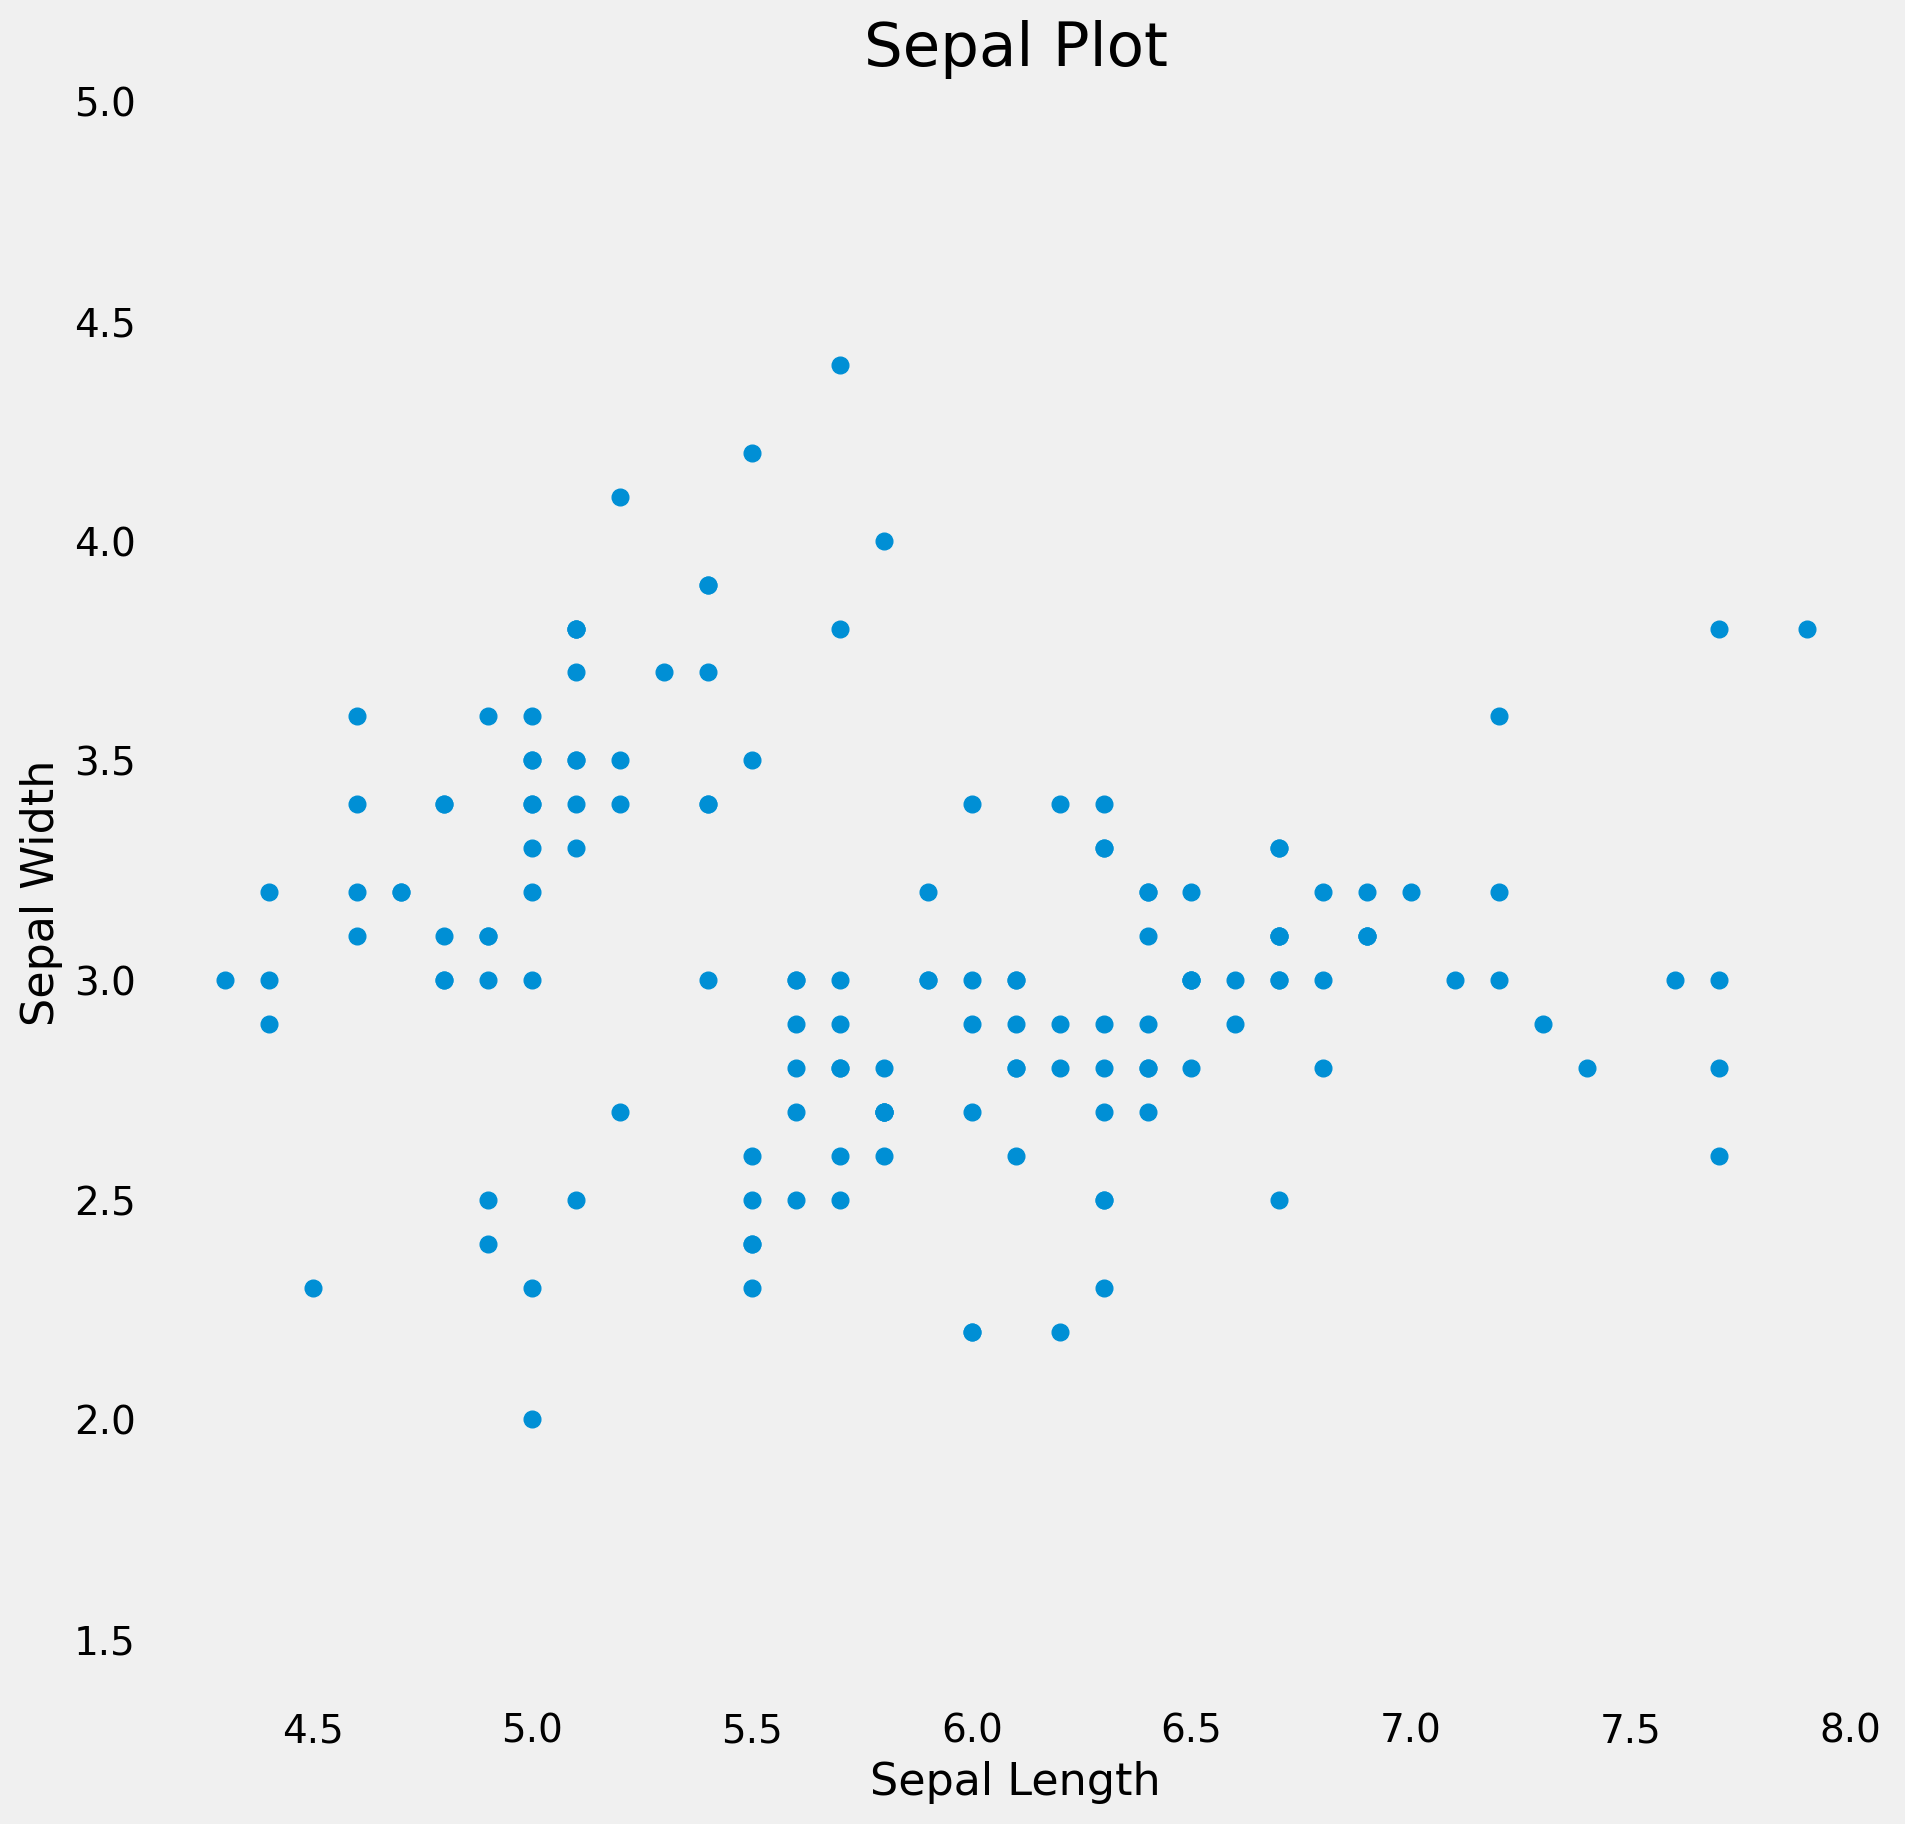

In [25]:
# sepal length vs sepal width 特征的散点图
plt.figure(figsize=(10,10), dpi=200)                 
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')
plt.axis('equal')                                                
plt.xlabel('Sepal Length', fontsize=16)                                         
plt.ylabel('Sepal Width', fontsize=16)                                          
plt.title('Sepal Plot', fontsize=22)                                  
plt.grid(linestyle='-.', c='')                                                                   
plt.show()

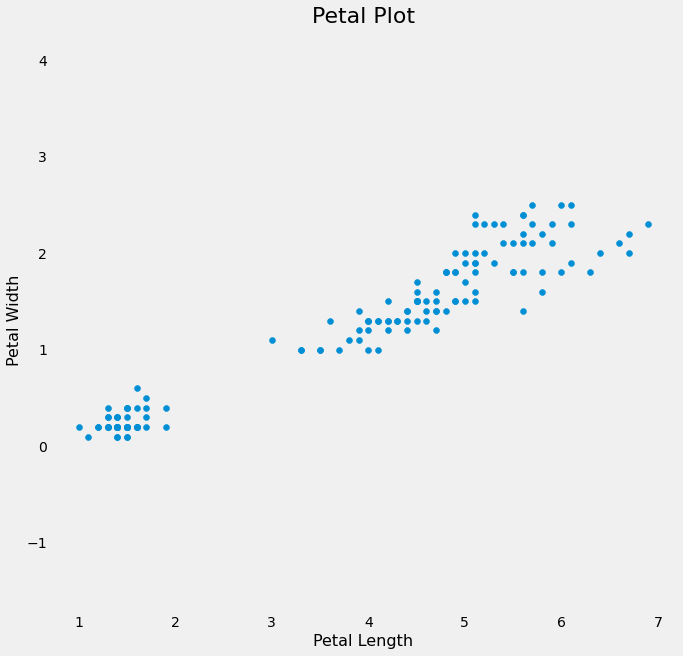

In [26]:
# petal length vs sepal width 特征的散点图
plt.figure(figsize=(10,10))                       
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

# Initialize fuzzy matrix

In [41]:
random.random()

0.6616233882783724

In [48]:
# 初始化隶属度矩阵 U
def init_fuzzy_matrix(n_sample, c):
    """
    初始化隶属度矩阵，注意针对一个样本，三个隶属度的相加和=1
    ----
    param n_sample: 样本数量
    param c: 聚类数量
    """
    # 针对数据集中所有样本的隶属度矩阵，shape = [n_sample, c]
    fuzzy_matrix = []
    
    for i in range(n_sample):
        # 生成 c 个随机数列表, random.random()方法随机生成[0,1)范围内的一个实数。
        random_list = [random.random() for i in range(c)]
        sum_of_random = sum(random_list)
        # 归一化之后的随机数列表
        # 单个样本的模糊隶属度列表
        norm_random_list = [x/sum_of_random for x in random_list]
        # 选择随机参数列表中最大的数的索引
        one_of_random_index = norm_random_list.index(max(norm_random_list))
        
        for j in range(0, len(norm_random_list)):
            if(j == one_of_random_index):
                norm_random_list[j] = 1
            else:
                norm_random_list[j] = 0
                
        fuzzy_matrix.append(norm_random_list)
    
    return fuzzy_matrix

In [50]:
fuzzy_matrix = init_fuzzy_matrix(n_sample=n, c=c)
fuzzy_matrix

[[0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 0, 1],
 [1, 0, 0],
 [0, 1, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [1,

In [51]:
list(zip(*fuzzy_matrix))

[(0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0),
 (1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,

In [54]:
len(list(zip(*fuzzy_matrix))), len(list(zip(*fuzzy_matrix))[0])

(3, 150)

# Calculating Cluster Center

In [63]:
# 计算FCM的聚类中心
def cal_cluster_centers(df, fuzzy_matrix, n_sample, c, m):
    """
    param df: 数据集的特征集，不包含标签列
    param fuzzy_matrix: 隶属度矩阵
    param c: 聚类簇数量
    param m: 加权指数
    """
    # *字符称为解包运算符
    # zip(*fuzzy_amtrix) 相当于将fuzzy_matrix按列展开并拼接，但并不合并！
    # list(zip(*fuzzy_amtrix)) 包含 列数 个元组。
    fuzzy_mat_ravel = list(zip(*fuzzy_matrix))
    
    cluster_centers = []
    
    # 遍历聚类数量次
    for j in range(c):
        # 取出属于某一类的所有样本的隶属度列表（隶属度矩阵的一列）
        fuzzy_one_dim_list = list(fuzzy_mat_ravel[j])
        # 计算隶属度的m次方
        m_fuzzy_one_dim_list = [p ** m for p in fuzzy_one_dim_list]
        # 隶属度求和，求解聚类中心公式中的分母
        denominator = sum(m_fuzzy_one_dim_list)
        
        # 
        numerator_list = []
        
        # 遍历所有样本，求分子
        for i in range(n_sample):
            # 取出一个样本
            sample = list(df.iloc[i])
            # 聚类簇中心的分子部分，样本与对应的隶属度的m次方相乘
            mul_sample_fuzzy = [m_fuzzy_one_dim_list[i] * val for val in sample]
            numerator_list.append(mul_sample_fuzzy)
        # 计算分子，求和
        numerator = map(sum, list(zip(*numerator_list)))
        cluster_center = [val/denominator for val in numerator]
        cluster_centers.append(cluster_center)
        
    return cluster_centers

In [64]:
cal_cluster_centers(df, fuzzy_matrix, n_sample=n, c=c, m=m)

[[5.840350877192981,
  2.963157894736842,
  3.7912280701754386,
  1.1491228070175437],
 [5.746296296296295,
  3.1222222222222222,
  3.6574074074074074,
  1.1888888888888887],
 [5.982051282051281, 3.1051282051282043, 3.848717948717947, 1.287179487179487]]

# Updating Membership Value

In [97]:
# 更新隶属度矩阵，参考公式 (8)
def update_fuzzy_matrix(df, fuzzy_matrix, n_sample, c, m, cluster_centers):
    # 分母的指数项
    order = float(2 / (m - 1))
    # 遍历样本
    for i in range(n_sample):
        # 单个样本
        sample = list(df.iloc[i])
        # 计算更新公式的分母：样本减去聚类中心
        distances = [np.linalg.norm(  np.array(list(  map(operator.sub, sample, cluster_centers[j])  ))  ) \
                     for j in range(c)]
        for j in range(c):
            # 更新公式的分母
            denominator = sum([math.pow(float(distances[j]/distances[val]), order) for val in range(k)])
            fuzzy_matrix[i][j] = float(1 / denominator)
            
    return fuzzy_matrix  #, distances

# Getting the clusters

In [71]:
# 获取聚类中心
def get_clusters(fuzzy_matrix, n_sample):
    # 隶属度最大的那一个维度作为最终的聚类结果
    cluster_labels = []
    for i in range(n_sample):
        max_val, idx = max( (val, idx) for (idx, val) in enumerate(fuzzy_matrix[i]) )
        cluster_labels.append(idx)
    return cluster_labels

# Fuzzy C-Means 

In [171]:
# 模糊c均值聚类算法
def fuzzy_c_means(df, fuzzy_matrix, n_sample, c, m, max_iter=MAX_ITER, init_method='random'):
    """
    param init_random: 聚类中心的初始化方法
            - random: 从样本中随机选择c个作为聚类中心
            - multi_normal: 多元高斯分布采样
    """
    # 样本特征数量
    n_features = df.shape[-1]
    # 初始化隶属度矩阵
    fuzzy_matrix = init_fuzzy_matrix(n_sample, c)
    # 初始化迭代次数
    current_iter = 0
    # 初始化聚类中心
    init_cluster_centers = []
    cluster_centers = []
    # 初始化样本聚类标签的列表，每次迭代都需要保存每个样本的聚类
    max_iter_cluster_labels = []
    # 选择初始化方法
    if init_method == 'multi_normal':
        # 均值列表
        mean = [0] * n_features
        # 多元高斯分布的协方差矩阵，对角阵
        cov = np.identity(n_features)
        for i in range(0, c):
            init_cluster_centers.append(  list( np.random.multivariate_normal(mean, cov) )  )
#     else:
#         init_cluster_centers = [[0.1] * n_features ] * c
        
    print(init_cluster_centers)
    
    while current_iter < max_iter:
        if current_iter == 0 and init_method == 'multi_normal':
            cluster_centers = init_cluster_centers
        else:
            cluster_centers = cal_cluster_centers(df, fuzzy_matrix, n_sample, c, m)
        fuzzy_matrix = update_fuzzy_matrix(df, fuzzy_matrix, n_sample, c, m, cluster_centers)
        cluster_labels = get_clusters(fuzzy_matrix, n_sample)
        max_iter_cluster_labels.append(cluster_labels)
        
        current_iter += 1
        
        print('-' * 32)
        print("Fuzzy Matrix U:\n")
        print(np.array(fuzzy_matrix))
        
    return cluster_centers, cluster_labels, max_iter_cluster_labels

In [84]:
[[0] * 4] * 3

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [73]:
np.random.multivariate_normal?

In [83]:
np.identity?

# Calculating the Accuracy

In [109]:
class_labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]

In [133]:
true_labels = pd.Series(labels).map(target_dicts)
true_labels

0       virginica
1       virginica
2       virginica
3       virginica
4       virginica
          ...    
145        setosa
146        setosa
147        setosa
148        setosa
149    versicolor
Length: 150, dtype: object

In [134]:
true_labels.values[-1]

'versicolor'

In [136]:
true_labels.values[70]

'versicolor'

In [137]:
np.unique(true_labels)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [123]:
class_labels[-1] == 2

True

In [173]:
centers, labels, acc = fuzzy_c_means(df, 
                                     fuzzy_matrix, 
                                     n_sample, 
                                     c, m, 
                                     max_iter=20, init_method='random') # multi_normal

[]
--------------------------------
Fuzzy Matrix U:

[[0.28134391 0.29393819 0.4247179 ]
 [0.27870313 0.29012919 0.43116768]
 [0.2816685  0.29271715 0.42561435]
 [0.27870866 0.2893393  0.43195205]
 [0.2822783  0.29461131 0.42311039]
 [0.28091235 0.29601707 0.42307057]
 [0.28078907 0.292167   0.42704393]
 [0.27875934 0.29107571 0.43016495]
 [0.28139712 0.29110731 0.42749557]
 [0.27854183 0.28966668 0.43179149]
 [0.28306972 0.29667273 0.42025755]
 [0.27762685 0.28930286 0.4330703 ]
 [0.28025296 0.29091651 0.42883053]
 [0.2868421  0.29611879 0.41703911]
 [0.2935835  0.30711545 0.39930105]
 [0.29460974 0.30900807 0.39638219]
 [0.28662249 0.30081026 0.41256725]
 [0.28022338 0.29333453 0.42644209]
 [0.28325732 0.29858805 0.41815463]
 [0.28218122 0.29545027 0.42236851]
 [0.27598084 0.28977143 0.43424774]
 [0.27978262 0.2936115  0.42660588]
 [0.28834589 0.29917889 0.41247522]
 [0.26946322 0.28399538 0.4465414 ]
 [0.27244699 0.28403782 0.44351519]
 [0.27466571 0.28647808 0.43885621]
 [0.2742845

--------------------------------
Fuzzy Matrix U:

[[1.09606970e-04 1.55881186e-04 9.99734512e-01]
 [1.42970147e-03 2.05532306e-03 9.96514975e-01]
 [1.20182375e-03 1.70065054e-03 9.97097526e-01]
 [2.22031376e-03 3.18925751e-03 9.94590429e-01]
 [2.17649526e-04 3.08059836e-04 9.99474291e-01]
 [6.22002523e-03 8.93264525e-03 9.84847330e-01]
 [1.21221873e-03 1.71849714e-03 9.97069284e-01]
 [6.22329732e-06 8.94656010e-06 9.99984830e-01]
 [6.97560641e-03 9.90983349e-03 9.83114560e-01]
 [8.69408867e-04 1.25451216e-03 9.97876079e-01]
 [2.22543888e-03 3.16448064e-03 9.94610080e-01]
 [2.73339070e-04 3.94717262e-04 9.99331944e-01]
 [1.94358912e-03 2.78113863e-03 9.95275272e-01]
 [8.58888655e-03 1.18836900e-02 9.79527423e-01]
 [1.52212062e-02 2.07312361e-02 9.64047558e-01]
 [2.67600010e-02 3.64438606e-02 9.36796138e-01]
 [4.92698560e-03 6.85421760e-03 9.88218797e-01]
 [9.94339511e-05 1.41731531e-04 9.99758835e-01]
 [1.11864201e-02 1.60665656e-02 9.72747014e-01]
 [1.22060798e-03 1.73050017e-03 9.9704

--------------------------------
Fuzzy Matrix U:

[[5.08693484e-05 1.54559558e-04 9.99794571e-01]
 [9.49363872e-04 3.02741630e-03 9.96023220e-01]
 [7.45806190e-04 2.26208458e-03 9.96992109e-01]
 [1.46862601e-03 4.69098048e-03 9.93840394e-01]
 [1.06832110e-04 3.19846339e-04 9.99573322e-01]
 [4.10763567e-03 1.26638148e-02 9.83228550e-01]
 [7.59651626e-04 2.31642862e-03 9.96923920e-01]
 [3.40781192e-06 1.07548678e-05 9.99985837e-01]
 [4.58742501e-03 1.42454632e-02 9.81167112e-01]
 [5.84887126e-04 1.88113547e-03 9.97533977e-01]
 [1.43021202e-03 4.29235203e-03 9.94277436e-01]
 [1.90097349e-04 6.11216779e-04 9.99198686e-01]
 [1.27079634e-03 3.99593466e-03 9.94733269e-01]
 [5.62323711e-03 1.60109306e-02 9.78365832e-01]
 [1.01783008e-02 2.64058268e-02 9.63415872e-01]
 [1.81341247e-02 4.67525214e-02 9.35113354e-01]
 [3.16831682e-03 8.87892379e-03 9.87952759e-01]
 [5.03474187e-05 1.54235657e-04 9.99795417e-01]
 [7.38512156e-03 2.26014067e-02 9.70013472e-01]
 [7.59893011e-04 2.27423928e-03 9.9696

--------------------------------
Fuzzy Matrix U:

[[5.08578938e-05 1.54487009e-04 9.99794655e-01]
 [9.44927347e-04 3.01192354e-03 9.96043149e-01]
 [7.43013605e-04 2.25288152e-03 9.97004105e-01]
 [1.46185479e-03 4.66729867e-03 9.93870847e-01]
 [1.06745271e-04 3.19521073e-04 9.99573734e-01]
 [4.09021186e-03 1.26098540e-02 9.83299934e-01]
 [7.56711256e-04 2.30681680e-03 9.96936472e-01]
 [3.38846638e-06 1.06901419e-05 9.99985921e-01]
 [4.56797882e-03 1.41793395e-02 9.81252682e-01]
 [5.82032553e-04 1.87108464e-03 9.97546883e-01]
 [1.42491513e-03 4.27593977e-03 9.94299145e-01]
 [1.89080526e-04 6.07711447e-04 9.99203208e-01]
 [1.26522355e-03 3.97667057e-03 9.94758106e-01]
 [5.60287991e-03 1.59490190e-02 9.78448101e-01]
 [1.01454140e-02 2.63259024e-02 9.63528684e-01]
 [1.80728441e-02 4.66136420e-02 9.35313514e-01]
 [3.15765521e-03 8.84963042e-03 9.87992714e-01]
 [5.02752704e-05 1.53977910e-04 9.99795747e-01]
 [7.35428195e-03 2.25071839e-02 9.70138534e-01]
 [7.57317825e-04 2.26628159e-03 9.9697

 [3.27223040e-01 6.64713238e-01 8.06372167e-03]]
--------------------------------
Fuzzy Matrix U:

[[5.08725733e-05 1.54512885e-04 9.99794615e-01]
 [9.44264698e-04 3.00932359e-03 9.96046412e-01]
 [7.42636508e-04 2.25142016e-03 9.97005943e-01]
 [1.46085202e-03 4.66332537e-03 9.93875823e-01]
 [1.06761357e-04 3.19532490e-04 9.99573706e-01]
 [4.08776832e-03 1.26013008e-02 9.83310931e-01]
 [7.56310513e-04 2.30528135e-03 9.96938408e-01]
 [3.38529571e-06 1.06786281e-05 9.99985936e-01]
 [4.56518484e-03 1.41683808e-02 9.81266434e-01]
 [5.81597888e-04 1.86938038e-03 9.97549022e-01]
 [1.42422266e-03 4.27345728e-03 9.94302320e-01]
 [1.88920322e-04 6.07103494e-04 9.99203976e-01]
 [1.26441113e-03 3.97348021e-03 9.94762109e-01]
 [5.60010151e-03 1.59390548e-02 9.78460844e-01]
 [1.01410848e-02 2.63139440e-02 9.63544971e-01]
 [1.80645302e-02 4.65924035e-02 9.35343066e-01]
 [3.15630500e-03 8.84529670e-03 9.87998398e-01]
 [5.02768785e-05 1.53964101e-04 9.99795759e-01]
 [7.34993190e-03 2.24922989e-02 9.701

--------------------------------
Fuzzy Matrix U:

[[5.08745763e-05 1.54516449e-04 9.99794609e-01]
 [9.44175916e-04 3.00897503e-03 9.96046849e-01]
 [7.42586072e-04 2.25122446e-03 9.97006189e-01]
 [1.46071768e-03 4.66279269e-03 9.93876490e-01]
 [1.06763576e-04 3.19534183e-04 9.99573702e-01]
 [4.08744118e-03 1.26001548e-02 9.83312404e-01]
 [7.56256902e-04 2.30507568e-03 9.96938667e-01]
 [3.38487107e-06 1.06770853e-05 9.99985938e-01]
 [4.56481069e-03 1.41669119e-02 9.81268277e-01]
 [5.81539635e-04 1.86915186e-03 9.97549309e-01]
 [1.42413007e-03 4.27312497e-03 9.94302745e-01]
 [1.88898841e-04 6.07021945e-04 9.99204079e-01]
 [1.26430232e-03 3.97305260e-03 9.94762645e-01]
 [5.59972976e-03 1.59377198e-02 9.78462550e-01]
 [1.01405058e-02 2.63123434e-02 9.63547151e-01]
 [1.80634177e-02 4.65895593e-02 9.35347023e-01]
 [3.15612455e-03 8.84471681e-03 9.87999159e-01]
 [5.02771212e-05 1.53962322e-04 9.99795761e-01]
 [7.34934946e-03 2.24903047e-02 9.70160346e-01]
 [7.56962901e-04 2.26496622e-03 9.9697

In [140]:
target_dicts

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [131]:
max(set(labels[0:50]), key=labels[0:50].count)

2

In [138]:
max(set(labels[50:100]), key=labels[50:100].count)

1

In [139]:
max(set(labels[100:]), key=labels[100:].count)

0

In [128]:
labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [185]:
print("Cluster center vectors:") #final cluster centers
print(np.array(centers))

Cluster center vectors:
[[6.80708536 3.05986103 5.68312238 2.06082495]
 [5.88746183 2.75258809 4.36914763 1.40571013]
 [5.00539655 3.41794861 1.47835686 0.25278714]]


# Plotting the data

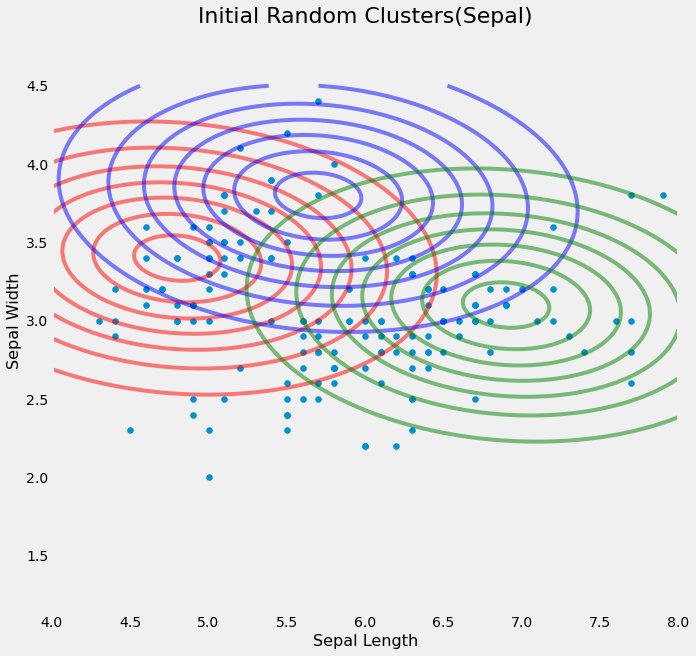

In [187]:
def plot_random_init_iris_sepal(df_full):
    sepal_df = df_full.iloc[:,0:2]
    sepal_df = np.array(sepal_df)
    
    m1 = random.choice(sepal_df)
    m2 = random.choice(sepal_df)
    m3 = random.choice(sepal_df)

    cov1 = np.cov(np.transpose(sepal_df))
    cov2 = np.cov(np.transpose(sepal_df))
    cov3 = np.cov(np.transpose(sepal_df))
    
    x1 = np.linspace(4,8,150)  
    x2 = np.linspace(1.5,4.5,150)
    X, Y = np.meshgrid(x1,x2) 

    Z1 = multivariate_normal(m1, cov1)  
    Z2 = multivariate_normal(m2, cov2)
    Z3 = multivariate_normal(m3, cov3)
    
    # a new array of given shape and type, without initializing entries
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))
    plt.scatter(sepal_df[:,0], sepal_df[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5)
    # making both the axis equal
    plt.axis('equal')                                                                 
    plt.xlabel('Sepal Length', fontsize=16)
    plt.ylabel('Sepal Width', fontsize=16)
    plt.title('Initial Random Clusters(Sepal)', fontsize=22)
    plt.grid()
    plt.show()
    
plot_random_init_iris_sepal(df_full)

In [176]:
def plot_random_init_iris_petal(df_full):
    petal_df = df_full.iloc[:,2:4]
    petal_df = np.array(petal_df)
    
    m1 = random.choice(petal_df)
    m2 = random.choice(petal_df)
    m3 = random.choice(petal_df)
    cov1 = np.cov(np.transpose(petal_df))
    cov2 = np.cov(np.transpose(petal_df))
    cov3 = np.cov(np.transpose(petal_df))

    x1 = np.linspace(-1,7,150)
    x2 = np.linspace(-1,4,150)
    X, Y = np.meshgrid(x1,x2) 

    Z1 = multivariate_normal(m1, cov1)  
    Z2 = multivariate_normal(m2, cov2)
    Z3 = multivariate_normal(m3, cov3)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))
    plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
    plt.axis('equal') 
    plt.xlabel('Petal Length', fontsize=16) 
    plt.ylabel('Petal Width', fontsize=16)
    plt.title('Initial Random Clusters(Petal)', fontsize=22)
    plt.grid()
    plt.show()

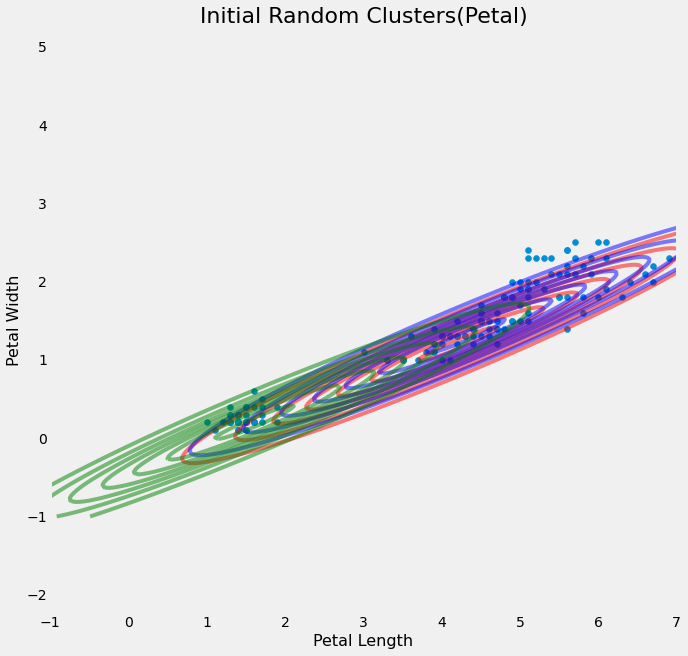

In [177]:
plot_random_init_iris_petal(df_full)

In [181]:
def plot_cluster_iris_sepal(df_full, labels, centers):
    # finding mode
    seto = max(set(labels[0:50]), key=labels[0:50].count) # 2
    vers = max(set(labels[50:100]), key=labels[50:100].count) # 1
    virg = max(set(labels[100:]), key=labels[100:].count) # 0
    
    # sepal
    s_mean_clus1 = np.array([centers[seto][0],centers[seto][1]])
    s_mean_clus2 = np.array([centers[vers][0],centers[vers][1]])
    s_mean_clus3 = np.array([centers[virg][0],centers[virg][1]])
    
    values = np.array(labels) #label

    # search all 3 species
    searchval_seto = seto
    searchval_vers = vers
    searchval_virg = virg

    # index of all 3 species
    ii_seto = np.where(values == searchval_seto)[0]
    ii_vers = np.where(values == searchval_vers)[0]
    ii_virg = np.where(values == searchval_virg)[0]
    ind_seto = list(ii_seto)
    ind_vers = list(ii_vers)
    ind_virg = list(ii_virg)
    
    sepal_df = df_full.iloc[:,0:2]
    
    seto_df = sepal_df[sepal_df.index.isin(ind_seto)]
    vers_df = sepal_df[sepal_df.index.isin(ind_vers)]
    virg_df = sepal_df[sepal_df.index.isin(ind_virg)]
    
    cov_seto = np.cov(np.transpose(np.array(seto_df)))
    cov_vers = np.cov(np.transpose(np.array(vers_df)))
    cov_virg = np.cov(np.transpose(np.array(virg_df)))
    
    sepal_df = np.array(sepal_df)
    
    x1 = np.linspace(4,8,150)  
    x2 = np.linspace(1.5,4.5,150)
    X, Y = np.meshgrid(x1,x2) 

    Z1 = multivariate_normal(s_mean_clus1, cov_seto)  
    Z2 = multivariate_normal(s_mean_clus2, cov_vers)
    Z3 = multivariate_normal(s_mean_clus3, cov_virg)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          
    plt.scatter(sepal_df[:,0], sepal_df[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
    plt.axis('equal')                                                                  
    plt.xlabel('Sepal Length', fontsize=16)
    plt.ylabel('Sepal Width', fontsize=16)
    plt.title('Final Clusters(Sepal)', fontsize=22)  
    plt.grid()
    plt.show()

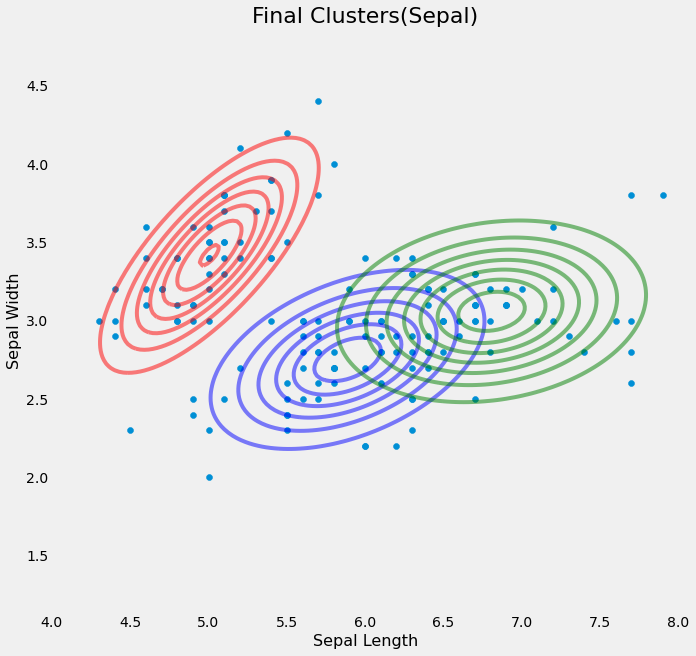

In [182]:
plot_cluster_iris_sepal(df_full, labels, centers)

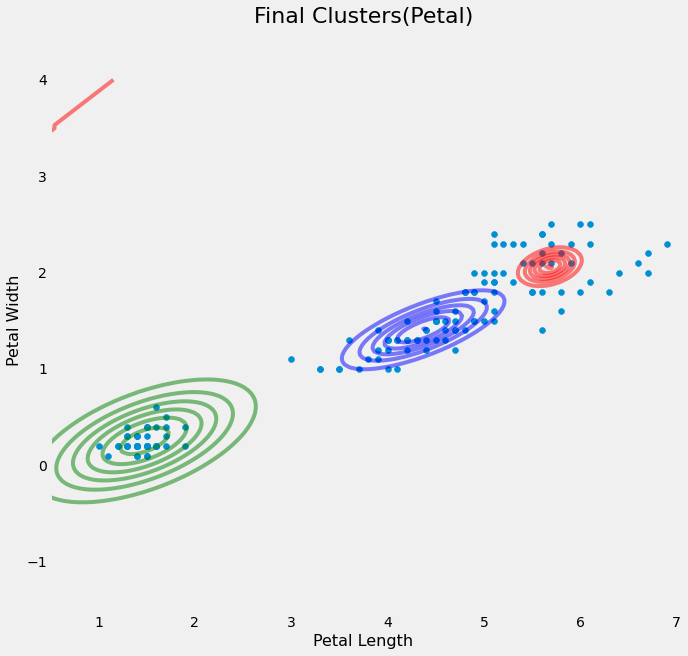

In [183]:
def plot_cluster_iris_petal(df_full, labels, centers):
    # petal
    p_mean_clus1 = np.array([centers[seto][2],centers[seto][3]])
    p_mean_clus2 = np.array([centers[vers][2],centers[vers][3]])
    p_mean_clus3 = np.array([centers[virg][2],centers[virg][3]])
    
    petal_df = df_full.iloc[:,2:4]
    
    seto_df = petal_df[petal_df.index.isin(ind_seto)]
    vers_df = petal_df[petal_df.index.isin(ind_vers)]
    virg_df = petal_df[petal_df.index.isin(ind_virg)]
    
    cov_seto = np.cov(np.transpose(np.array(seto_df)))
    cov_vers = np.cov(np.transpose(np.array(vers_df)))
    cov_virg = np.cov(np.transpose(np.array(virg_df)))
    
    petal_df = np.array(petal_df) 
    
    x1 = np.linspace(0.5,7,150)  
    x2 = np.linspace(-1,4,150)
    X, Y = np.meshgrid(x1,x2) 

    Z1 = multivariate_normal(p_mean_clus1, cov_seto)  
    Z2 = multivariate_normal(p_mean_clus2, cov_vers)
    Z3 = multivariate_normal(p_mean_clus3, cov_virg)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                         
    plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5) 
    plt.axis('equal')                                               
    plt.xlabel('Petal Length', fontsize=16)
    plt.ylabel('Petal Width', fontsize=16)
    plt.title('Final Clusters(Petal)', fontsize=22)
    plt.grid()
    plt.show()

plot_cluster_iris_petal(df_full, labels, centers)